# Deimantų kainų analizė
### Šiame duomenų rinkinyje yra beveik 54 000 deimantų. Jų kainos ir kiti atributai:
- **Karatai (Carat) - (0.2-5.01):**

Mato vienetas, kuriuo matuojamas yra deimantas. 1 karatas yra viena penktoji gramo (0.2 g). 1 karato deimantas lygus 100-ui taškų. Ct yra jo trumpinimas.
- **Briaunavimas (Cut) - (Ideal (Idealus), Premium, Very Good, Good, Fair (Prastas)):**

Deimanto briaunavimas - Kuo tiksliau deimantas išpjaustomas tuo jis vertingesnis bei geriau atspindi šviesą.
- **Spalva (Color) - (D (Geriausias), E, F, G, H, I, J (Blogiausias)):**

Brangakmenių kokybės deimantų spalva yra įvairių atspalvių. Nuo bespalvės (D) iki šviesiai geltonos (J). Bespalviai deimantai yra patys rečiausi.
- **Deimanto skaidrumas (Clarity) - (IF (Geriausias), VVS1, VVS2, VS1, VS2, SI1, SI2, I1 (Prasčiausias)):**

Deimantai gali turėti vidinių savybių tokių kaip inkliuzai ar dėmės. Deimantai be intarpų yra itin reti.
- **Gylis (Depth) - (43-79):**

Tai bendras gylio procentas, lygus z / vidurkis (x, y) = 2 * z / (x + y). Deimanto gylis yra jo aukštis (milimetrais), matuojamas nuo deimanto apačios iki plokščio viršutinio paviršiaus.
- **Deimanto viršaus plotis (Table) - (43-95):**

Deimanto viršaus plotis matuojamas plačiausiu tašku.
- **Kaina (Price) - (326-18826):**

Deimanto kaina JAV doleriais.
- **X (3,73 - 10,74):**

Deimanto ilgis (mm).
- **Y (3,68 - 58,9):**

Deimanto plotis (mm).
- **Z (1,07 - 31,8):**

Deimanto gylis (mm).

##### 1. Kurių deimantų yra daugiausiai pagal kiekvieną kategoriją?
##### 2. Koks deimantų kainų skirtumas pagal kategorijas?
##### 3. Nuo ko daugiausiai priklauso deimanto kaina?
##### 4. Kokiu tikslumu galima pasakyti deimanto kainą žinant kiekvieną kategoriją?

## Importavimas

In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('diamonds.csv')

## Duomenų tikrinimas ir tvarkymas

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [106]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [107]:
len(df)

53940

In [108]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [109]:
df[df[['x', 'y', 'z']] == 0].count()

Unnamed: 0     0
carat          0
cut            0
color          0
clarity        0
depth          0
table          0
price          0
x              8
y              7
z             20
dtype: int64

In [110]:
df = df.drop('Unnamed: 0', axis = 1)
df = df.drop(df[df['x'] == 0].index)
df = df.drop(df[df['y'] == 0].index)
df = df.drop(df[df['z'] == 0].index)

In [111]:
len(df)

53920

### Naujų stulpelių kūrimas

In [112]:
print(df['carat'].quantile(0.25),'|', 
df['carat'].quantile(0.5), '|',
df['carat'].quantile(0.75), '|', 
df['carat'].quantile(1))

0.4 | 0.7 | 1.04 | 5.01


In [113]:
def carat_avg(num):
    if num <= 0.4:
        return "0,2 - 0,4"
    elif num <= 0.7:
        return "0,41 - 0,7"
    elif num <= 1.00:
        return "0,71 - 1"
    else:
        return "1+"

In [114]:
df['carat_avg'] = df['carat'].map(carat_avg)

In [115]:
(df.carat_avg).value_counts()

1+            17486
0,2 - 0,4     14391
0,41 - 0,7    12771
0,71 - 1       9272
Name: carat_avg, dtype: int64

In [116]:
df['avg_one_carat_price'] = ((df.price)/(df.carat)).astype(int)

In [117]:
df.clarity.value_counts().sort_index()

I1        738
IF       1790
SI1     13063
SI2      9185
VS1      8170
VS2     12254
VVS1     3654
VVS2     5066
Name: clarity, dtype: int64

In [118]:
def clarity_group(i):
    if i == 'IF':
        return 'IF(Best)'
    elif i == 'VVS1':
        return '(VVS1-VVS2)'
    elif i == 'VVS2':
        return '(VVS1-VVS2)'
    elif i == 'VS1':
        return '(VS1-VS2)'
    elif i == 'VS2':
        return '(VS1-VS2)'
    elif i == 'SI1':
        return '(SI1-SI2)'
    elif i == 'SI2':
        return '(SI1-SI2)'
    elif i == 'I1':
        return 'I1(Worst)'

In [119]:
df['clarity_group'] = df['clarity'].map(clarity_group)

In [120]:
(df.clarity_group).value_counts()

(SI1-SI2)      22248
(VS1-VS2)      20424
(VVS1-VVS2)     8720
IF(Best)        1790
I1(Worst)        738
Name: clarity_group, dtype: int64

In [121]:
df.to_csv('Diamond.csv')

## Analizė

**Karatai (Carat)**

1+            17486
0,2 - 0,4     14391
0,41 - 0,7    12771
0,71 - 1       9272
Name: carat_avg, dtype: int64


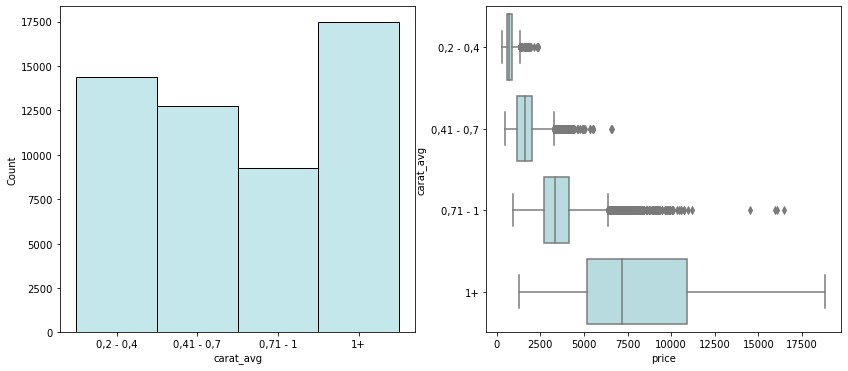

In [122]:
fig, axs = plt.subplots(1, 2, figsize = (14,6))
sns.histplot(df['carat_avg'], ax = axs[0], color = 'powderblue')
sns.boxplot(x = 'price', y = 'carat_avg', color = 'powderblue', data = df, ax = axs[1])
print(df['carat_avg'].value_counts())

- **Didesnių nei vieno karato deimantų yra daugiausiai.**

- **Deimantai didesni nei 1 karatas turi labai didelį kainų skirtumą.**
- **Mažiausias kainų skirtumas yra mažiausiems deimantams.**

**Briaunavimas (Cut)**

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64


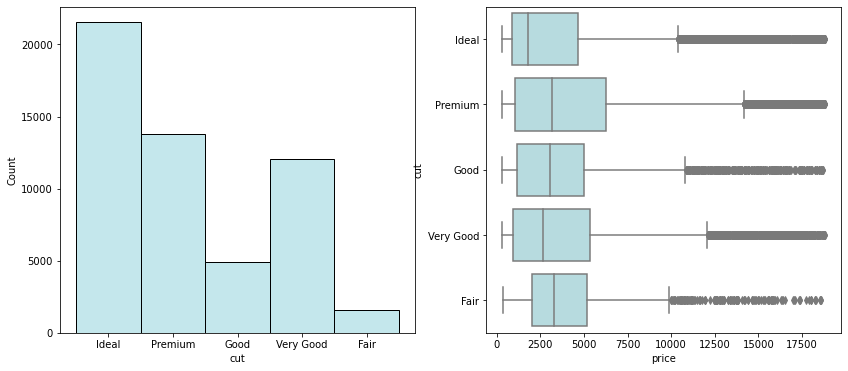

In [123]:
fig, axs = plt.subplots(1, 2, figsize = (14,6))
sns.histplot(df['cut'], ax = axs[0], color = 'powderblue')
sns.boxplot(x = 'price', y = 'cut', color = 'powderblue', data = df, ax = axs[1])
print(df['cut'].value_counts())

- **Idealaus briaunavimo deimantų yra daugiausiai.**
- **Prasčiausio briaunavimo deimantų yra mažiausiai.**

- **Didžiausias kainų skirtumas yra tarp Premium briaunavimo deimantų.**
- **Prasčiausio (Fair) briaunavimo deimantai turi mažiausią kainų skirtumą.**

**Spalva (Color)**

G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64


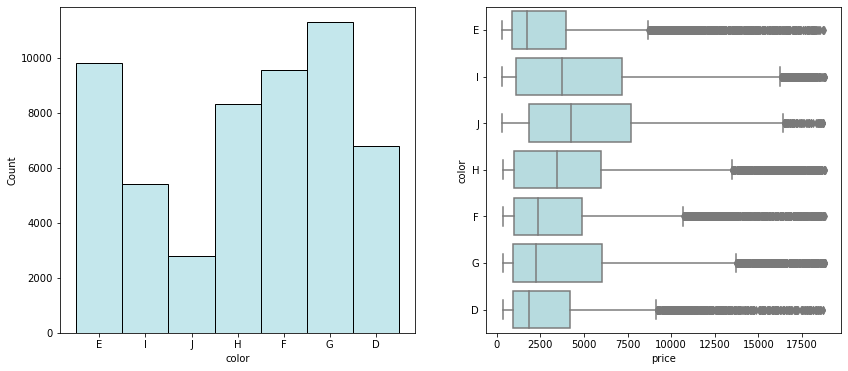

In [124]:
fig, axs = plt.subplots(1, 2, figsize = (14,6))
sns.histplot(df['color'], ax = axs[0], color = 'powderblue')
sns.boxplot(x = 'price', y = 'color', color = 'powderblue', data = df, ax = axs[1])
print(df['color'].value_counts())

- **G spalvos deimantų yra daugiausiai.**
- **J (prasčiausios) spalvos yra mažiausiai - 2808.**
- **D (geriausios) spalvos deimantų yra - 6774.**

- **Prasčiausios spalvos (J, I) deimantai turi didžiausią kainų skirtumą.**
- **Geriausios (D, E) spalvos deimantai turi nedidelį kainų skirtumą.**

**Skaidrumas (Clarity)**

(SI1-SI2)      22248
(VS1-VS2)      20424
(VVS1-VVS2)     8720
IF(Best)        1790
I1(Worst)        738
Name: clarity_group, dtype: int64


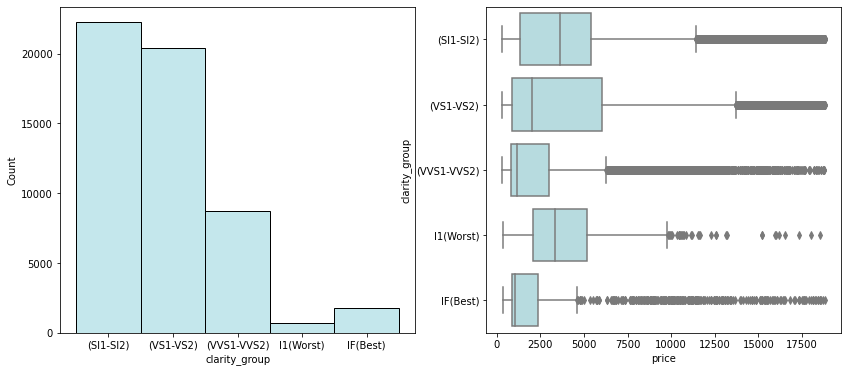

In [125]:
fig, axs = plt.subplots(1, 2, figsize = (14,6))
sns.histplot(df['clarity_group'], ax = axs[0], color = 'powderblue')
sns.boxplot(x = 'price', y = 'clarity_group', color = 'powderblue', data = df, ax = axs[1])
print(df['clarity_group'].value_counts())

- **Daugiausiai deimantų yra SI1, SI2 skaidrumo.**
- **Prasčiausių ir geriausių deimantų yra maža dalis. I1 sudaro 738 vnt., IF 1790 vnt.**

- **(VS1 ir VS2) skaidrumo deimantai turi didžiausią kainų skirtumą.**

## Duomenų keitimas

In [126]:
df1 = df.copy()

In [127]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   carat                53920 non-null  float64
 1   cut                  53920 non-null  object 
 2   color                53920 non-null  object 
 3   clarity              53920 non-null  object 
 4   depth                53920 non-null  float64
 5   table                53920 non-null  float64
 6   price                53920 non-null  int64  
 7   x                    53920 non-null  float64
 8   y                    53920 non-null  float64
 9   z                    53920 non-null  float64
 10  carat_avg            53920 non-null  object 
 11  avg_one_carat_price  53920 non-null  int32  
 12  clarity_group        53920 non-null  object 
dtypes: float64(6), int32(1), int64(1), object(5)
memory usage: 7.6+ MB


In [128]:
columns = ['cut', 'color', 'clarity', 'carat_avg', 'clarity_group']
label_encoder = LabelEncoder()
for col in columns:
    df1[col] = label_encoder.fit_transform(df1[col])

In [129]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   carat                53920 non-null  float64
 1   cut                  53920 non-null  int32  
 2   color                53920 non-null  int32  
 3   clarity              53920 non-null  int32  
 4   depth                53920 non-null  float64
 5   table                53920 non-null  float64
 6   price                53920 non-null  int64  
 7   x                    53920 non-null  float64
 8   y                    53920 non-null  float64
 9   z                    53920 non-null  float64
 10  carat_avg            53920 non-null  int32  
 11  avg_one_carat_price  53920 non-null  int32  
 12  clarity_group        53920 non-null  int32  
dtypes: float64(6), int32(6), int64(1)
memory usage: 6.5 MB


In [130]:
model = smf.ols(formula='price ~ carat + cut + color + clarity + depth + table + x + y + z', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.699e+04
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:51:39   Log-Likelihood:            -4.5542e+05
No. Observations:               53920   AIC:                         9.109e+05
Df Residuals:                   53896   BIC:                         9.111e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2711.9832    413.798      6.554      0.000    1900.936    3523.030
cut[T.Good]        574.3906     33.526     17.132      0.000     508.678     640.103
cut[T.Ideal]       824.8785     33.339     24.742      0.000     759.534     890.223
cut[T.Premium]     753.0040     32.164     23.411      0.000     689.962     816.046
cut[T.Very Good]   717.3414     32.178     22.293      0.000     654.272     780.411
color[T.E]        -208.9032     17.849    -11.704      0.000    -243.887    -173.919
color[T.F]        -267.4026     18.052    -14.813      0.000    -302.784    -232.021
color[T.G]        -477.1752     17.676    -26.996      0.000    -511.820    -442.531
color[T.H]        -979.7585     18.792    -52.138      0.000   -1016.590    -942.927
color[T.I]       -1470.2534     21.114    -69.635      0.000   -1511.636   -1428.871
color[T.J]       -2376.0662     26.071    -91.138      0.000   -2427.166   -2324.967
clarity[T.IF]     5340.2771     50.968    104.777      0.000    5240.380    5440.174
clarity[T.SI1]    3677.7624     43.617     84.320      0.000    3592.273    3763.252
clarity[T.SI2]    2716.6898     43.801     62.023      0.000    2630.839    2802.541
clarity[T.VS1]    4587.0437     44.519    103.035      0.000    4499.785    4674.302
clarity[T.VS2]    4276.3465     43.831     97.563      0.000    4190.436    4362.257
clarity[T.VVS1]   5004.0100     47.120    106.198      0.000    4911.655    5096.365
clarity[T.VVS2]   4951.8223     45.819    108.073      0.000    4862.016    5041.628
carat             1.153e+04     51.630    223.235      0.000    1.14e+04    1.16e+04
depth              -65.0768      4.639    -14.029      0.000     -74.169     -55.985
table              -26.4441      2.905     -9.102      0.000     -32.139     -20.749
x                -1100.6815     34.993    -31.455      0.000   -1169.267   -1032.096
y                   25.9330     19.447      1.334      0.182     -12.183      64.049
z                 -114.9809     37.840     -3.039      0.002    -189.147     -40.815
==============================================================================
Omnibus:                    14447.606   Durbin-Watson:                   1.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           637923.673
Skew:                           0.537   Prob(JB):                         0.00
Kurtosis:                      19.816   Cond. No.                     7.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [131]:
model = smf.ols(formula='price ~ carat + color + clarity + depth + table + x + y + z + carat_avg + avg_one_carat_price + clarity_group', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.500e+05
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:51:40   Log-Likelihood:            -4.1101e+05
No. Observations:               53920   AIC:                         8.221e+05
Df Residuals:                   53896   BIC:                         8.223e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      1.15e+04    161.399     71.234      0.000    1.12e+04    1.18e+04
color[T.E]                     141.1937      7.866     17.950      0.000     125.776     156.611
color[T.F]                     238.0843      7.996     29.776      0.000     222.413     253.756
color[T.G]                     377.2251      7.980     47.271      0.000     361.584     392.866
color[T.H]                     480.8513      8.851     54.325      0.000     463.502     498.200
color[T.I]                     633.0690     10.314     61.378      0.000     612.853     653.285
color[T.J]                     579.4137     13.071     44.327      0.000     553.794     605.033
clarity[T.IF]                  781.3289     17.159     45.535      0.000     747.698     814.960
clarity[T.SI1]                2704.0930     33.871     79.835      0.000    2637.706    2770.480
clarity[T.SI2]                2824.3555     34.182     82.627      0.000    2757.359    2891.352
clarity[T.VS1]                 742.7865     11.642     63.800      0.000     719.967     765.606
clarity[T.VS2]                 861.5271     11.720     73.509      0.000     838.556     884.498
clarity[T.VVS1]                543.2415     12.301     44.162      0.000     519.131     567.352
clarity[T.VVS2]                730.2214     12.212     59.797      0.000     706.286     754.156
carat_avg[T.0,41 - 0,7]       -262.4816     10.418    -25.195      0.000    -282.901    -242.062
carat_avg[T.0,71 - 1]         -922.0917     16.457    -56.031      0.000    -954.347    -889.836
carat_avg[T.1+]              -1182.2226     20.166    -58.624      0.000   -1221.748   -1142.697
clarity_group[T.(VS1-VS2)]    1604.3136     22.239     72.138      0.000    1560.724    1647.903
clarity_group[T.(VVS1-VVS2)]  1273.4629     22.016     57.843      0.000    1230.311    1316.614
clarity_group[T.I1(Worst)]    2309.4684     38.813     59.502      0.000    2233.394    2385.543
clarity_group[T.IF(Best)]      781.3289     17.159     45.535      0.000     747.698     814.960
carat                         1.024e+04     34.839    293.978      0.000    1.02e+04    1.03e+04
depth                         -114.4989      2.037    -56.204      0.000    -118.492    -110.506
table                          -11.6384      1.039    -11.203      0.000     -13.675      -9.602
x                            -2580.7844     22.734   -113.521      0.000   -2625.343   -2536.225
y                              -23.9095      8.515     -2.808      0.005     -40.599      -7.220
z                             -151.0291     16.611     -9.092      0.000    -183.586    -118.472
avg_one_carat_price              1.3249      0.003    468.233      0.000       1.319       1.330
============================================================================

## Statistinis modeliavimas

In [132]:
y = df1['price']

In [133]:
x = df1[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'carat_avg', 'avg_one_carat_price', 'clarity_group']]

In [134]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=2)

In [135]:
lm = LinearRegression()

In [136]:
lm.fit(x_train, y_train)

LinearRegression()

In [137]:
predictions = lm.predict(x_test)

Spėjimo tikslumas yra 0.9843 %.


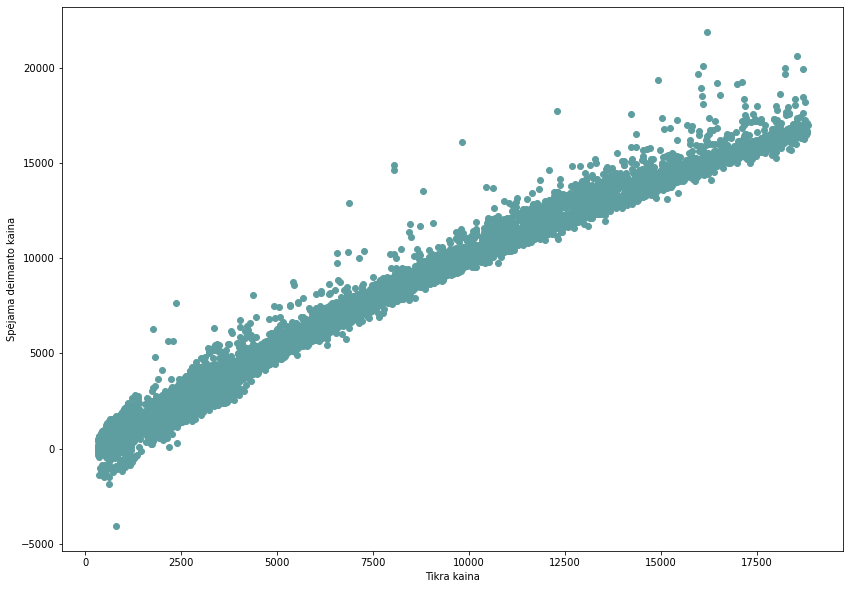

In [138]:
fig, ax = plt.subplots(1,1, figsize=(14,10))
ax.scatter(x=y_test, y=predictions, color = 'cadetblue')
ax.set_xlabel("Tikra kaina")
ax.set_ylabel("Spėjama deimanto kaina")
print('Spėjimo tikslumas yra', r2_score(y_test, predictions).round(4), '%.')

In [139]:
coeff_df = pd.DataFrame(lm.coef_, x.columns, columns=['price'])
coeff_df

,price
carat,10023.378422
cut,3.878523
color,99.238658
clarity,-24.400910
depth,-114.621994
table,-11.733790
x,-2502.192156
y,-25.869961
carat_avg,-420.505469
avg_one_carat_price,1.295105


<AxesSubplot:>

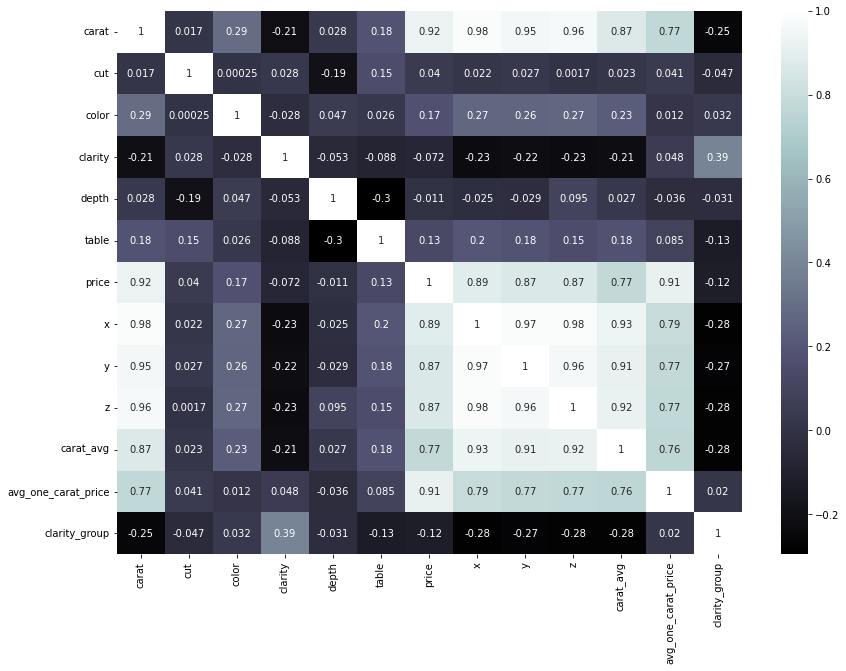

In [140]:
fig = plt.subplots(figsize = (14,10))
sns.heatmap(df1.corr(), annot = True, cmap="bone")

### Deimanto kaina labiausiai priklauso nuo karatų. Bei jo matmenų (x, y, z).

<AxesSubplot:xlabel='price', ylabel='carat'>

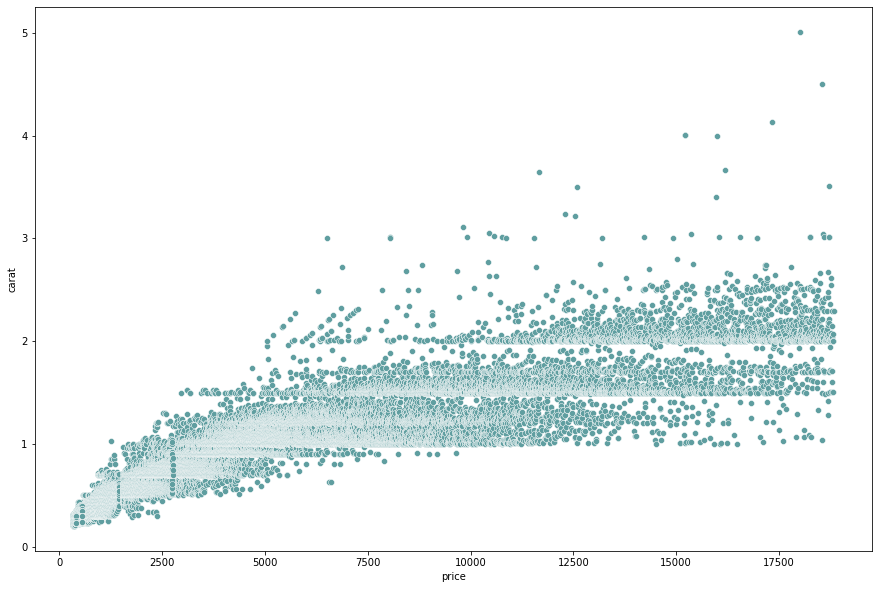

In [141]:
fig = plt.subplots(figsize = (15,10))
sns.scatterplot(x = 'price', y = 'carat', data = df, color = 'cadetblue')